Reference resource: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

We aim to analyze the sentiment of the tweets provided from the Sentiment140 dataset by developing a machine learning pipeline involving the use of three classifiers (Logistic Regression, Bernoulli Naive Bayes, and SVM)along with using Term Frequency- Inverse Document Frequency (TF-IDF). The performance of these classifiers is then evaluated using accuracy and F1 Scores.

### Problem Statement

In this project, we try to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets. The necessary details regarding the dataset are:

The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. The various columns present in the dataset are:

target: the polarity of the tweet (positive or negative)

ids: Unique id of the tweet

date: the date of the tweet

flag: It refers to the query. If no such query exists then it is NO QUERY.

user: It refers to the name of the user that tweeted

text: It refers to the text of the tweet

### Project Pipeline

The various steps involved in the Machine Learning Pipeline are :

1. Import Necessary Dependencies

2. Read and Load the Dataset

3. Exploratory Data Analysis

4. Data Visualization of Target Variables

5. Data Preprocessing

6. Splitting our data into Train and Test Subset

7. Transforming Dataset using TF-IDF Vectorizer

8. Function for Model Evaluation

9. Model Building

10. Conclusion

### 1. Import the libraries

In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### 2. Read and load the dataset

In [4]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1071747,4,1966377368,Fri May 29 17:39:20 PDT 2009,NO_QUERY,sunshineblack,@RachelHipp ate at app grill 2night....thanks...
296773,0,1997212794,Mon Jun 01 16:27:14 PDT 2009,NO_QUERY,ebstarling25,"@guille171170 Bwah, me, too! I don't like sum..."
119551,0,1828061116,Sun May 17 12:00:36 PDT 2009,NO_QUERY,FrannyPants,work starts tomorrow
295577,0,1996897812,Mon Jun 01 15:53:25 PDT 2009,NO_QUERY,jadekirk,Can't seem to concentrate on this fic. Will co...
170287,0,1962867632,Fri May 29 11:49:34 PDT 2009,NO_QUERY,gridskipper007,@cfuess is making me hungry. i had a bowl of ...


### 3. Exploratory data analysis

In [5]:
df.head() #first five records of data

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.columns #for columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1)

In [7]:
print('Length of the data set is: ',len(df)) # length of data

Length of the data set is:  1600000


In [8]:
df.shape # shape of the data

(1600000, 6)

In [9]:
df.info() # info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.dtypes # datatypes of all columns

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [11]:
np.sum(df.isnull().any(axis=1)) # checking for null values

0

In [12]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [13]:
df['target'].unique()

array([0, 4])

In [14]:
df['target'].dtype

dtype('int64')

In [15]:
df['target'].nunique() # To find out the number of unique elements in the object.Excludes NA values by default.

2

In [16]:
df.flag.nunique()

1

In [17]:
df['target'].sample(5)

1409553    4
400006     0
711377     0
1360330    4
149759     0
Name: target, dtype: int64

### 4. Data visualization of target variables

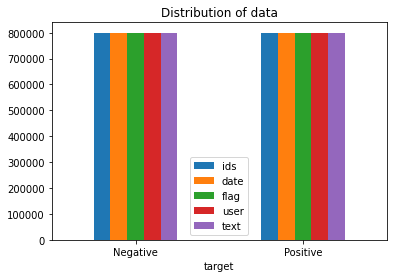

In [18]:
# plotting the distribution of dataset
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data')
ax.set_xticklabels(['Negative','Positive'],rotation=0)
# storing data in lists
text,sentiment=list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

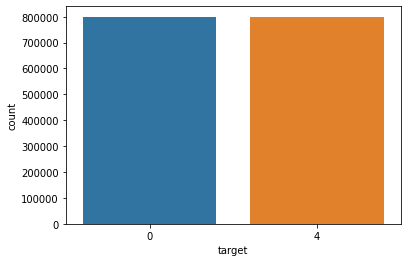

In [19]:
import seaborn as sns
sns.countplot(x='target', data=df)

### 5. Data preprocessing for better results

Remove emojis (already done in the downloaded dataset)

5.1 Convert into lower case for better generalization

5.2 Clean and remove URLs as they do not have any significant importance

5.3 Remove stopwords

5.4 Clean and remove punctuations

5.5 Clean and remove numbers

5.6 Tokenization of tweet text

5.7 Perform Stemming(reducing the words to their derived stems)

5.8 Perform Lemmatization (reducing the derived words to their root form known as lemma)

In [20]:
data = df.drop(['ids','date','flag','user'],axis=1) # selecting the text and target column for our further analysis

In [21]:
data['target'] = data['target'].replace(4,1) # replacing value 4 by value 1 for positive sentiment

In [22]:
data['target'].unique() #find out the unique values in target column of dataset data

array([0, 1])

In [23]:
data['target'].dtype #find out the data type of target column of dataset data

dtype('int64')

In [24]:
# data_pos.shape

In [25]:
# data_neg.shape

In [26]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### 5.1 convert 'text' column to lower case for better generalization

In [27]:
data['text']=data['text'].str.lower()
data['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [28]:
data['text'].head

<bound method NDFrame.head of 0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1600000, dtype: object>

In [29]:
# stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
            #  'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
            #  'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
            #  'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
            #  'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
            #  'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
            #  'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
            #  'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
            #  'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
            #  't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
            #  'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
            #  'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
            #  'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
            #  'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
            #  "youve", 'your', 'yours', 'yourself', 'yourselves']

In [30]:
# STOPWORDS = set(stopwordlist)
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
# data['text'].head()

#### 5.2 Clean and remove URLs

In [31]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data['text']=data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0    @switchfoot s a bummer.  you shoulda got david...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

#### 5.3 remove stopwords

In [32]:
stopwords1=stopwords.words('english')
stopwords1[:3]

['i', 'me', 'my']

In [33]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords1])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    @switchfoot bummer. shoulda got david carr thi...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

#### 5.4 clean and remove punctuations


In [34]:
from string import punctuation

punctuations_list = punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))

data['text'].head()

0    switchfoot bummer shoulda got david carr third...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no behaving all im mad here ca...
Name: text, dtype: object

In [35]:
data['text'].tail()

1599995                     woke up school best feeling ever
1599996         thewdbcom  cool hear old walt interviews â«
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [36]:
# # 5.4 Clean and remove repeating characters from the words
# def cleaning_repeating_characters(text):
#     return re.sub(r'(.)1+', r'1', text)
# data['text']=data['text'].apply(lambda x: cleaning_repeating_characters(x))
# data['text'].head()

#### 5.5 Clean and remove numbers

In [37]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
data['text']=data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0    switchfoot bummer shoulda got david carr third...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save  r...
3                     whole body feels itchy like fire
4    nationwideclass no behaving all im mad here ca...
Name: text, dtype: object

In [38]:
data['text'].tail()

1599995                     woke up school best feeling ever
1599996         thewdbcom  cool hear old walt interviews â«
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

### 5.6 Tokenization of tweet text

In [39]:
from nltk.tokenize import TweetTokenizer

# Instantiate a tweet tokenizer that will preserve each word (or token) as it is
tweet_tokenizer = TweetTokenizer(
    preserve_case = True,
    reduce_len    = False,
    strip_handles = False)

tweets=data['text']

tokens = [tweet_tokenizer.tokenize(t) for t in tweets]

print("Example of a tweet:\n{}\n".format(tweets[0]))
print("Tokens:\n{}".format(tokens[0]))

Example of a tweet:
switchfoot bummer shoulda got david carr third day it d

Tokens:
['switchfoot', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day', 'it', 'd']


In [40]:
data['text'] = tokens

In [41]:
data['text'].head()

0    [switchfoot, bummer, shoulda, got, david, carr...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, behaving, all, im, mad, ...
Name: text, dtype: object

#### 5.7 Apply Stemming

In [42]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

#### 5.8 Apply Lemmatizer

In [ ]:
from nltk.tag import pos_tag    # Part-of-speech tagger

tags = [pos_tag(t) for t in data['text']]

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# All we need is to know the type (Noun, Verb, or others) of each word
def _tag2type(tag):
    '''
    Take a tag and return a type.
    return 'n' for noun, 'v' for verb, and 'a' for any
    '''
    if tag.startswith('NN'):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return 'a'

lemmatizer = WordNetLemmatizer()
data['text']= [[lemmatizer.lemmatize(word, _tag2type(tag)) for (word, tag) in t] for t in tags]
data['text'].head()

In [ ]:
data['text'].tail()

#### 5.9 Seperate input feature and label

In [ ]:
X=data.text
y=data.target

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
# seperating data dataset into positive and negative dataframes

data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [ ]:
data_neg

In [ ]:
pos_tweets=data_pos['text'].values

In [ ]:
neg_tweets=data_neg['text'].values

##### Plot clouds of words for postive tweets and negative tweets

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(neg_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Negative tweets')


In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(pos_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Positive tweets')

#### Determining word density of the dataset

In [ ]:
from nltk import FreqDist

def get_all_words(tokens_list):
    '''
    Generator function to get a flat mapping of all words in the dataset.
    
    @arg tokens_list: A 2-D list of (preferably cleaned) tokens
    @return A list of all words
    '''
    for tokens in tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(pos_tweets)
all_neg_words = get_all_words(neg_tweets)

freq_dist_pos = FreqDist(all_pos_words)
freq_dist_neg = FreqDist(all_neg_words)

print("The 10 most common words in a set of positive tweets:\n{}\n".format(freq_dist_pos.most_common(10)))
print("The 10 most common words in a set of negative tweets:\n{}".format(freq_dist_neg.most_common(10)))

### 6. Splitting the data into train and test subsets

In [ ]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =50)

### 7.  Transforming Dataset using TF-IDF Vectorizer
#### 7.1: Fit the TF-IDF Vectorizer

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

#### 7.2 Transform the data using TF-IDF Vectorizer

In [ ]:
X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))

### 8. Model Evaluation

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### 9 Model Building

Following classifiers are evaluated to see which one gives the best performance:

9.1 Bernoulli Naive Bayes
9.2 SVM (Support Vector Machine)
9.3 Logistic Regression


#### 9.1: Model-1 Bernoulli Naive Bayes

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
# Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.2 Model-2 SVM (Support Vector Machine)

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
# Plot the ROC-AUC curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.3 Model-3 Logistic Regression

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.4 Model-4 K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
KNNmodel.fit(X_train, y_train)
model_Evaluate(KNNmodel)
y_pred4 = KNNmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.5 Model-5 Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(criterion='entropy', random_state=50)
DTmodel.fit(X_train, y_train)
model_Evaluate(DTmodel)
y_pred5 = DTmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### 9.6 Model-6 Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=50)
RFmodel.fit(X_train, y_train)
model_Evaluate(RFmodel)
y_pred6 = RFmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred6)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()